# Galaxy Gan

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
import os
os.chdir("/content/gdrive/My Drive/GalaxyProject")

Mounted at /content/gdrive


In [2]:
import torch
import torchvision.transforms as transforms
import torchvision
import numpy as np
from Generator import Generator
from Discriminator import Discriminator
from GalaxyDataset import GalaxyDataset
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from lossFunctions import discrim_loss, gen_loss

### Training Function


In [3]:
def train(data, netG, netD, criterion, num_epochs, optimG, optimD, batch_size, device):
  gLoss = []
  dLoss = []
  iters = 0

  for ep in range(num_epochs):
    for i, (images, extra) in enumerate(data, 0):
      # Train discriminator
      netD.zero_grad()
      noise = torch.randn((batch_size, 128))
      noise /= torch.max(noise)
      fakeOutput = netG(noise.to(device)).detach()
      fakeOutput = netD(fakeOutput)

      images = images.to(device)
      realOutput = netD(images)
      dError = discrim_loss(realOutput, fakeOutput, None)
      dError.backward()
      optimD.step()

      # Train Generator
      netG.zero_grad()
      noise = torch.randn((batch_size, 128))
      noise /= torch.max(noise)
      fakeImages = netG(noise.to(device))

      out = netD(fakeImages)
      errorG = gen_loss(out, None)
      errorG.backward()
      optimG.step()

      gLoss.append(errorG.item())
      dLoss.append(dError.item())  

      if (iters % 500 == 0) or ((ep == num_epochs - 1) and (i == len(data) - 1)):
          fakeImages = fakeImages.cpu()
          grid = torchvision.utils.make_grid(fakeImages[0:5, :, :, :], nrow=5)
          plt.imshow(grid.permute(1, 2, 0))
          plt.show()
      
      iters += 1
    return gLoss, dLoss

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")
print(device)

cuda:0


### Loading Dataset

In [5]:
trans = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(64),
            transforms.ToTensor(),
            #transforms.CenterCrop(64),
            #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ])

dataset = GalaxyDataset("training_solutions_rev1.csv", "images_training_rev1", trans)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2)

### Init Generator and Discriminator


In [6]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [7]:
netG = Generator(128).to(device)
netD = Discriminator().to(device)
weights_init(netG)
weights_init(netD)
optimG = optim.Adam(netG.parameters(), lr = 0.002, betas=(0.5, 0.99))
optimD = optim.Adam(netD.parameters(), lr = 0.002, betas=(0.5, 0.99))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


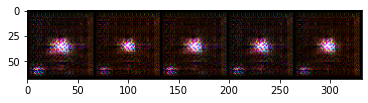

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


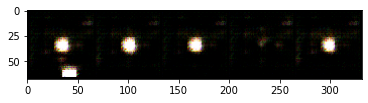

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


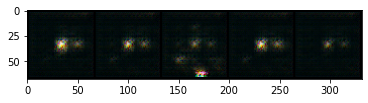

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


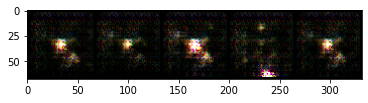

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


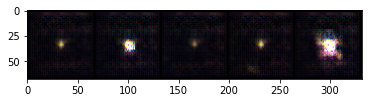

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


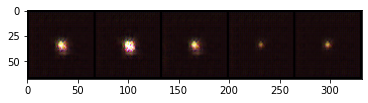

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


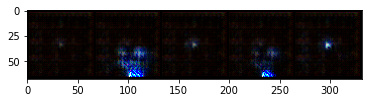

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


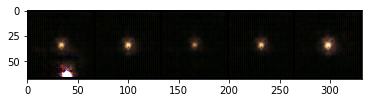

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


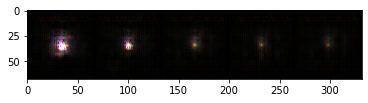

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


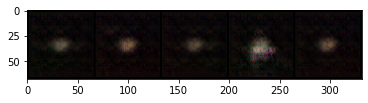

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


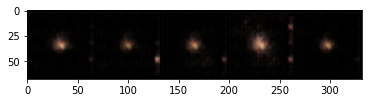

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


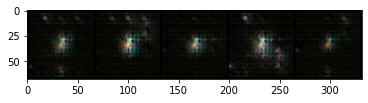

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


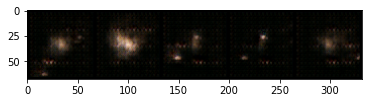

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


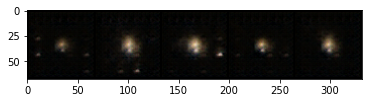

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


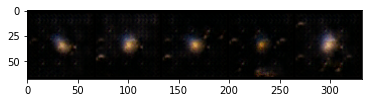

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


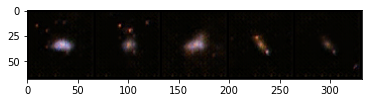

In [9]:
lossesG, lossesD = train(dataloader, netG, netD, nn.BCELoss(), 10, optimG, optimD, 8, device)

### Sample Images from Generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


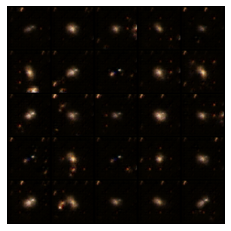

In [24]:
with torch.no_grad():
  noise = torch.randn((25, 128)).to(device)
  noise /= torch.max(noise)
  images = netG(noise)
  images = images.cpu()
  grid = torchvision.utils.make_grid(images, nrow=5)
  plt.imshow(grid.permute(1, 2, 0))
  plt.axis("off")
  plt.show()

### Saving generator

In [19]:
torch.save(netG, "latest_generator.pth")

### Saving Discriminator

In [20]:
torch.save(netD, "latest_discriminator.pth")